In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


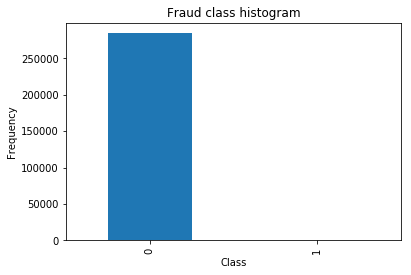

In [2]:
count_classes=pd.value_counts(data.Class,sort=True)
print(count_classes)
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler
data['normAmount']=StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
#下采样
X=data.ix[:,data.columns!='Class']
Y=data.ix[:,data.columns=='Class']

number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index

random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)

under_sample_indices=np.concatenate([fraud_indices,random_normal_indices],axis=0)

under_sample_data=data.iloc[under_sample_indices]

X_undersample=under_sample_data.ix[:,under_sample_data.columns!='Class']
Y_undersample=under_sample_data.ix[:,under_sample_data.columns=='Class']

print(len(under_sample_data[under_sample_data.Class==0]))
print(len(under_sample_data[under_sample_data.Class==1]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


492
492


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(len(X_train))
print(len(X_test))
print(len(X_train)+len(X_test))

199364
85443
284807


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train_undersample,X_test_undersample,Y_train_undersample,Y_test_undersample= \
train_test_split(X_undersample,Y_undersample,test_size=0.3,random_state=1)
print(len(X_train_undersample))
print(len(X_test_undersample))
print(len(X_train_undersample)+len(X_test_undersample))

688
296
984


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report


In [16]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)
    c_param_range = [0.01,0.1,1,10,100]
    results_table=pd.DataFrame(index=range(len(c_param_range)),columns=['C_parameter','Mean recall score'])
    results_table['C_parameter']=c_param_range
    
    j=0
    for c_param in c_param_range:
        print('---------------------------------')
        print('C_parameter:{}'.format(c_param))
        print('---------------------------------')
        print('')
        
        recall_accs=[]
        for iteration,indices in enumerate(fold,start=1):
            lr=LogisticRegression(C=c_param,penalty='l1')
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            
            recall_acc=recall_score(y_train_data.iloc[indices[1],:],y_pred_undersample)
            recall_accs.append(recall_acc)
            print('iteration',iteration,': recall score =',recall_acc)
        results_table.ix[j,'Mean recall score']=np.mean(recall_accs)
        j+=1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
        
    best_c=results_table.loc[np.array(results_table['Mean recall score']).argmax(),'C_parameter']
    print('***********************************************')
    print(best_c)
    print('***********************************************')
    return best_c

In [17]:
best_c = printing_Kfold_scores(X_train_undersample,Y_train_undersample)


---------------------------------
C_parameter:0.01
---------------------------------

iteration 1 : recall score = 1.0
iteration 2 : recall score = 0.8857142857142857
iteration 3 : recall score = 0.9859154929577465
iteration 4 : recall score = 0.9852941176470589
iteration 5 : recall score = 0.9852941176470589

Mean recall score  0.9684436027932299

---------------------------------
C_parameter:0.1
---------------------------------

iteration 1 : recall score = 0.9315068493150684
iteration 2 : recall score = 0.8285714285714286
iteration 3 : recall score = 0.9295774647887324
iteration 4 : recall score = 0.9117647058823529
iteration 5 : recall score = 0.8970588235294118

Mean recall score  0.8996958544173989

---------------------------------
C_parameter:1
---------------------------------

iteration 1 : recall score = 0.9041095890410958
iteration 2 : recall score = 0.8428571428571429
iteration 3 : recall score = 0.9295774647887324
iteration 4 : recall score = 0.9117647058823529
iteration

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


iteration 2 : recall score = 0.8714285714285714
iteration 3 : recall score = 0.9295774647887324
iteration 4 : recall score = 0.9117647058823529
iteration 5 : recall score = 0.8970588235294118

Mean recall score  0.9055275569614303

---------------------------------
C_parameter:100
---------------------------------

iteration 1 : recall score = 0.9178082191780822
iteration 2 : recall score = 0.8714285714285714
iteration 3 : recall score = 0.9154929577464789
iteration 4 : recall score = 0.9117647058823529
iteration 5 : recall score = 0.8970588235294118

Mean recall score  0.9027106555529795

***********************************************
0.01
***********************************************


In [33]:
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix
    '''
    plt.imshow(cm,interpolation='nearest',cmap=cmap)  #绘制热图
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],ha='center',color='white'\
                if cm[i,j] >thresh else 'black')
        plt.tight_layout()  #自动调整子图参数
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall metric in the testing dataset:  0.9507042253521126
[[125  29]
 [  7 135]]


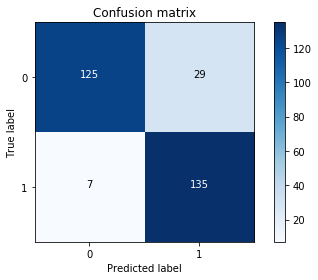

In [34]:
import itertools
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,Y_train_undersample)
y_pred_undersample=lr.predict(X_test_undersample)
cnf_matrix=confusion_matrix(Y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

print(cnf_matrix)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall metric in the testing dataset:  0.9407407407407408
[[71404 13904]
 [    8   127]]


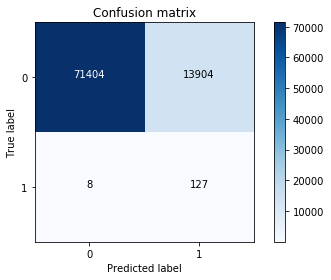

In [35]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train_undersample,Y_train_undersample)
y_pred=lr.predict(X_test)

cnf_matrix=confusion_matrix(Y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

In [36]:
best_c=printing_Kfold_scores(X_train,Y_train)


---------------------------------
C_parameter:0.01
---------------------------------

iteration 1 : recall score = 0.5342465753424658
iteration 2 : recall score = 0.625
iteration 3 : recall score = 0.5897435897435898
iteration 4 : recall score = 0.5588235294117647
iteration 5 : recall score = 0.5

Mean recall score  0.5615627388995641

---------------------------------
C_parameter:0.1
---------------------------------



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


iteration 1 : recall score = 0.589041095890411
iteration 2 : recall score = 0.6805555555555556
iteration 3 : recall score = 0.6153846153846154
iteration 4 : recall score = 0.6323529411764706
iteration 5 : recall score = 0.5454545454545454

Mean recall score  0.6125577506923195

---------------------------------
C_parameter:1
---------------------------------

iteration 1 : recall score = 0.6164383561643836
iteration 2 : recall score = 0.6805555555555556
iteration 3 : recall score = 0.6410256410256411
iteration 4 : recall score = 0.6617647058823529
iteration 5 : recall score = 0.5606060606060606

Mean recall score  0.6320780638467987

---------------------------------
C_parameter:10
---------------------------------

iteration 1 : recall score = 0.6301369863013698
iteration 2 : recall score = 0.6666666666666666
iteration 3 : recall score = 0.6538461538461539
iteration 4 : recall score = 0.6617647058823529
iteration 5 : recall score = 0.5606060606060606

Mean recall score  0.634604114660

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall metric in the testing dataset:  0.5777777777777777
[[85292    16]
 [   57    78]]


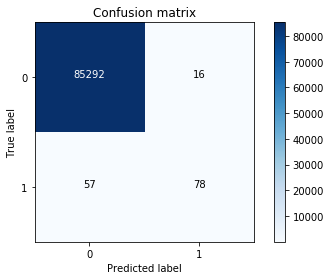

In [37]:
lr=LogisticRegression(C=best_c,penalty='l1')
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

cnf_matrix=confusion_matrix(Y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)
class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,title='Confusion matrix')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9859154929577465
Recall metric in the testing dataset:  0.9507042253521126
Recall metric in the testing dataset:  0.9014084507042254
Recall metric in the testing dataset:  0.8732394366197183
Recall metric in the testing dataset:  0.7535211267605634
Recall metric in the testing dataset:  0.6267605633802817


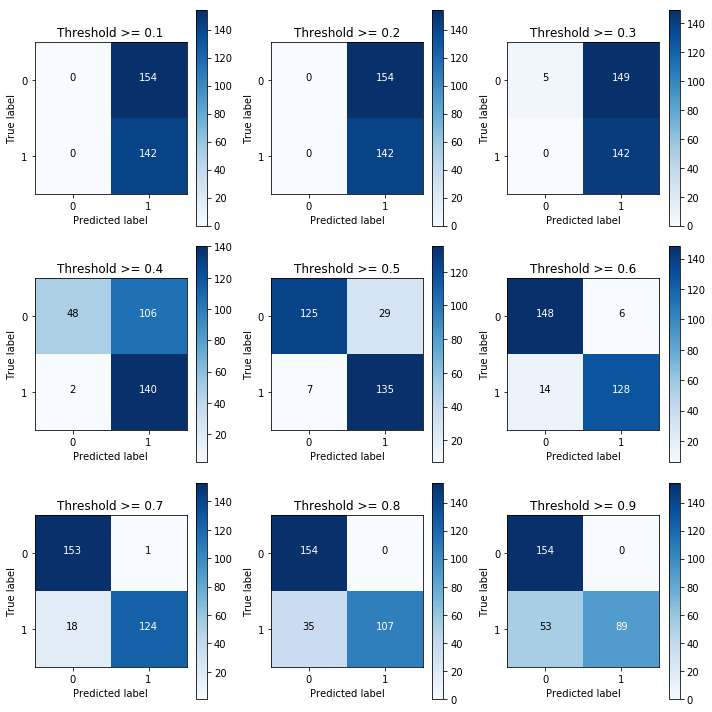

In [44]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,Y_train_undersample)
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  #不同的阈值
plt.figure(figsize=(10,10))
j=1
for i in thresholds:
    y_test_predictions_high_recall=y_pred_undersample_proba[:,1]>i
#     y_pred_new=np.zeros((len(Y_test_undersample),1))
#     y_pred_new[y_pred_undersample_proba[:,1]>i]=1
    plt.subplot(3,3,j)
    j+=1
    cnf_matrix=confusion_matrix(Y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
    

In [56]:
from imblearn.over_sampling import SMOTE
data=pd.read_csv('creditcard.csv')
columns=data.columns
print(columns)
feature_columns=columns.delete(len(columns)-1)
print(feature_columns)
features=data[feature_columns]
labels=data['Class']


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [57]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=1)


In [61]:
oversample=SMOTE(random_state=0)
os_features,os_labels=oversample.fit_sample(features_train,labels_train)


227440

In [62]:
os_features=pd.DataFrame(os_features)
os_labels=pd.DataFrame(os_labels)
printing_Kfold_scores(os_features,os_labels)

---------------------------------
C_parameter:0.01
---------------------------------

iteration 1 : recall score = 0.8866666666666667
iteration 2 : recall score = 0.9190751445086706
iteration 3 : recall score = 0.9702867264474704
iteration 4 : recall score = 0.963045198733732
iteration 5 : recall score = 0.96224278930707


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Mean recall score  0.9402633051327219

---------------------------------
C_parameter:0.1
---------------------------------

iteration 1 : recall score = 0.8866666666666667
iteration 2 : recall score = 0.9190751445086706
iteration 3 : recall score = 0.9719694453669877
iteration 4 : recall score = 0.9646500175870559
iteration 5 : recall score = 0.9638366162504397

Mean recall score  0.9412395780759641

---------------------------------
C_parameter:1
---------------------------------

iteration 1 : recall score = 0.8866666666666667
iteration 2 : recall score = 0.9190751445086706
iteration 3 : recall score = 0.9725893944425994
iteration 4 : recall score = 0.9653864755539923
iteration 5 : recall score = 0.9644961308476961

Mean recall score  0.941642762403925

---------------------------------
C_parameter:10
---------------------------------

iteration 1 : recall score = 0.8866666666666667
iteration 2 : recall score = 0.9190751445086706
iteration 3 : recall score = 0.9719030222517436
itera

1.0

Recall metric in the testing dataset:  0.8275862068965517


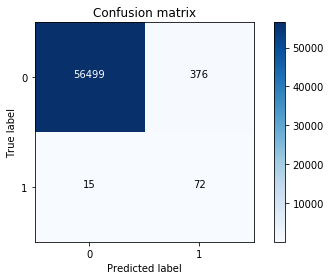

In [64]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)


cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))


class_names=[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')